# Project Name: Face Mask Detection 
In this project we are going to build an app that can apply some deep learning algorithm to detect wheather a face is masked or not from its image. 

### Importing the libraries

In [1]:
import os
from PIL import Image
import cv2 as cv
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

### Data visualization

In [2]:
# showing the number of images
categories = os.listdir('./dataset')
data_directory = './dataset'


n_mask = len(os.listdir(os.path.join(data_directory, categories[0])))
n_nomask = len(os.listdir(os.path.join(data_directory, categories[1])))

print(f'''
Faces with mask: {n_mask}
Faces with no mask: {n_nomask}
Total faces: {n_mask+n_nomask}
''')


Faces with mask: 503
Faces with no mask: 503
Total faces: 1006



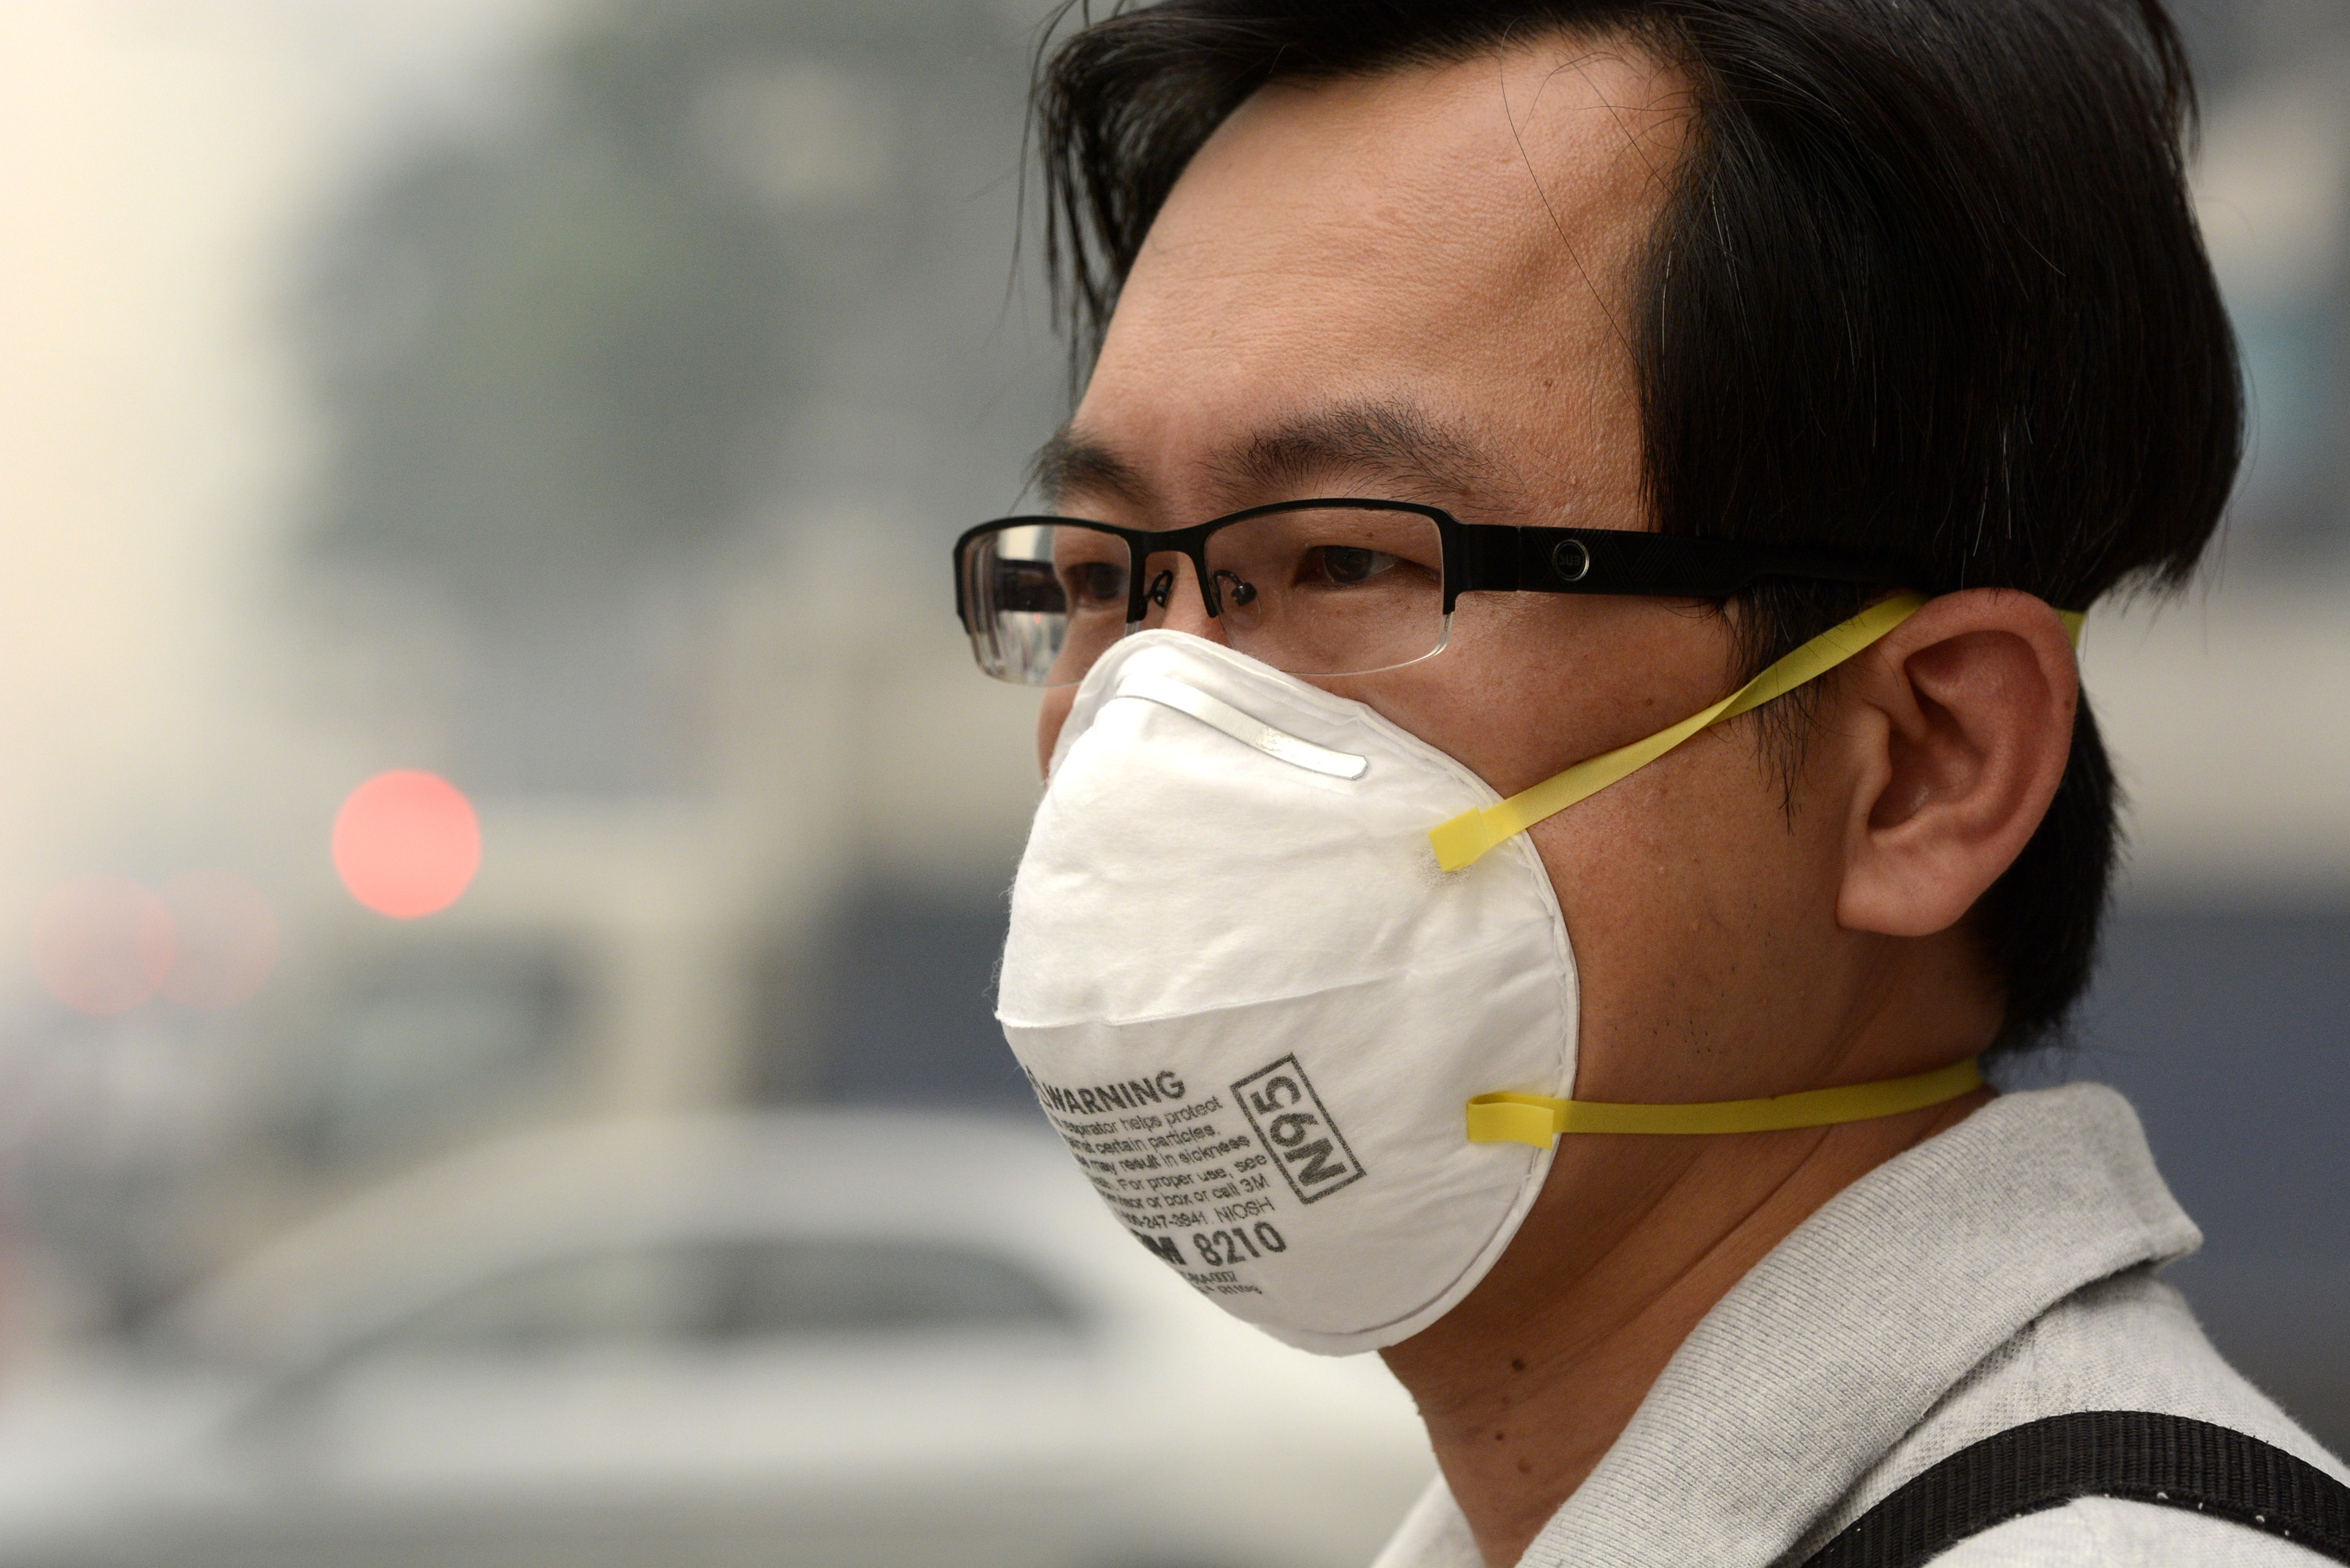

In [3]:
# showing one image with mask
path = './dataset/Mask'
image_path = os.path.join(path, os.listdir(path)[0])
Image.open(image_path)

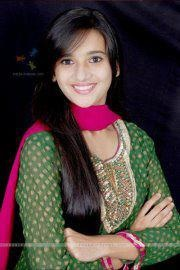

In [4]:
# showing one image with mask
path = './dataset/Non Mask'
image_path = os.path.join(path, os.listdir(path)[0])
Image.open(image_path)

### Building X and y

In [5]:
# creating a data list that contains the reshaped image matrix and its label
data = []

for category in categories:
    path = os.path.join(data_directory, category)

    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        img_matrix = cv.imread(image_path)
        img_resized = cv.resize(img_matrix, (224,224))
        label = categories.index(category)
        data.append([img_resized, label])

In [6]:
# shuffling the data to get a randomised combination of faces with mask and no mask
random.shuffle(data)

In [7]:
# Creating X and y
X = []
y = []

for image, label in data:
    X.append(image)
    y.append(label)

In [8]:
# converting X and y intp numpy array
X = np.array(X)
y = np.array(y)


print(f'''
Shape of X: {X.shape}
Shape of y: {y.shape}''')


Shape of X: (1006, 224, 224, 3)
Shape of y: (1006,)


In [9]:
# rescaling X
X = X/255

### Train-Test-Split

In [10]:
# splitting the dataset into Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [11]:
# printing the shape of the training and testing dataset
print(f'''
X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
X_test shape: {X_test.shape}
y_test shape: {y_test.shape}''')


X_train shape: (804, 224, 224, 3)
y_train shape: (804,)
X_test shape: (202, 224, 224, 3)
y_test shape: (202,)


### Model Training

In [12]:
# let call the vgg face model from tensorflow
vgg = keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3))

In [15]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
# main model
model = keras.Sequential(
    [
        vgg,
        keras.layers.Flatten(),
        keras.layers.Dense(2, activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [18]:
# fitting the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
26/26 [==============================] - 230s 9s/step - loss: 0.4041 - accuracy: 0.8483
Epoch 2/5
26/26 [==============================] - 262s 10s/step - loss: 0.0771 - accuracy: 0.9714
Epoch 3/5
26/26 [==============================] - 265s 10s/step - loss: 0.0318 - accuracy: 0.9888
Epoch 4/5
26/26 [==============================] - 267s 10s/step - loss: 0.0094 - accuracy: 1.0000
Epoch 5/5
26/26 [==============================] - 266s 10s/step - loss: 0.0073 - accuracy: 1.0000


### Model Evaluation

In [19]:
y_pred_raw = model.predict(X_test)

7/7 [==============================] - 61s 8s/step


In [20]:
# predicted y
y_pred = [np.argmax(x) for x in y_pred_raw]

In [21]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 54s 8s/step - loss: 0.0679 - accuracy: 0.9752


[0.06785833090543747, 0.9752475023269653]

In [22]:
# accuracy score
round(accuracy_score(y_test, y_pred),4)*100

97.52

In [23]:
# classification report
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.98      0.97      0.98       107

    accuracy                           0.98       202
   macro avg       0.97      0.98      0.98       202
weighted avg       0.98      0.98      0.98       202



Text(0.5, 1.0, 'Confusion Matrix')

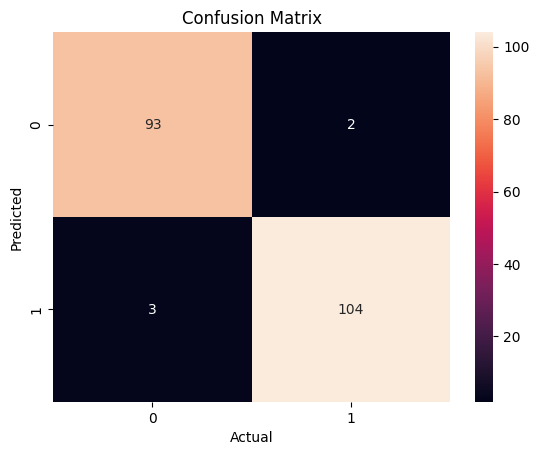

In [24]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    cbar=True,
    fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

### Final Model Training

In [26]:
# final model
final_model = keras.Sequential(
    [
        vgg,
        keras.layers.Flatten(),
        keras.layers.Dense(2, activation='sigmoid')
    ]
)

final_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

final_model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 311s 10s/step - loss: 0.4064 - accuracy: 0.8569
Epoch 2/5
32/32 [==============================] - 328s 10s/step - loss: 0.0577 - accuracy: 0.9841
Epoch 3/5
32/32 [==============================] - 326s 10s/step - loss: 0.0276 - accuracy: 0.9960
Epoch 4/5
32/32 [==============================] - 325s 10s/step - loss: 0.0126 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 327s 10s/step - loss: 0.0074 - accuracy: 1.0000


### Saving the final model

In [30]:
final_model.save('./artifacts/model.h5')

### Testing 

In [7]:
model = tf.keras.models.load_model('./artifacts/model.h5')

In [10]:
# function to check if whether a face is masked or not
def predict_masked_face(frame):
    frame_img = cv.imread(frame)
    frame_resized = cv.resize(frame_img, (224, 224))
    frame_scalled = frame_resized/255
    y_pred = np.argmax(model.predict(frame_scalled.reshape(1, 224, 224, 3)))
    return y_pred 

In [15]:
img_path = './TestImages/Sample5.jpg'
predict_masked_face(img_path)

1/1 [==============================] - 0s 308ms/step


1